In [1]:
from base import np, plt

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a spherical shell with inner radii ($r_0$) and thicknesses ($\lambda$), with the restriction $r_0 + \lambda \leq L$.

$$
c_{\text{shell}}(r; r_0,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3 \lambda^2 r_0 + 3 \lambda r_0^2} & \text{if } r_0 \leq r \leq r_0 + \lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

In [2]:
def shell_generator(r0, l):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on r0 and l'
        cond = (r >= r0) & (r <= r0 + l)
        c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

### Iterate over radii $(r_0)$ \& Comsumption Times $(T_c)$ 📄

In [126]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 100,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': (0.01, 1), #  (1e-3, 1e3)
    'n_Tc' : 250,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_r0': 250,
    'l': 0.5
}

FM_r0 = FluxMap3D(syst_params, shell_generator)
FM_r0.solve(n_jobs=-1)

ODEs solved:  50%|████▉     | 31008/62500 [01:20<01:18, 402.37it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 62500/62500 [03:42<00:00, 281.39it/s]


We want to draw the transect between the areas where the bacteria would be attracted to the diatom and the areas where they would be repelled based on the gradient of the concentration of nutrients.

First, we need to find the minimum flux $\phi$ for each $T_c$:
$$m_{\phi} (T_c) = \min_{r_0} \phi(r_0, T_c)$$

This corresponds to the minimum flux for each row from the transposed flux map $\phi^T$.
$$\phi(r_0, T_c) \approx \phi[i_{r_0}, j_{T_c}] = \phi^T[j_{T_c}, i_{r_0}]$$

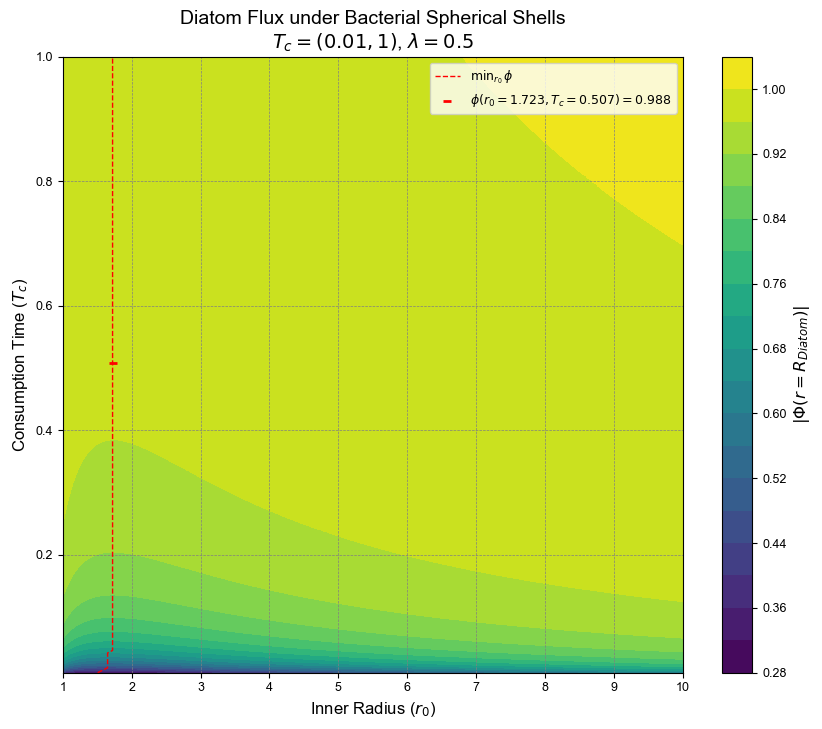

In [ ]:
# Get the flux map
φ = FM_r0.flux_map

# Find the positions where these minima occur
minr0_indices = [np.argmin(φi) for φi in φ.T]
# Get the corresponding r0 values for the maximum flux
r0_transect = [FM_r0.x_values[i] for i in minr0_indices]

# Plot the flux map
FM_r0.plot()

# Add the maximum flux line connecting the maxima
FM_r0.ax.plot(r0_transect, FM_r0.y_values, 'r--', label='$\\text{min}_{r_0} \\, \\phi$', linewidth=1)

r0_p = r0_transect[syst_params['n_r0']//2]
Tc_p = FM_r0.y_values[syst_params['n_Tc']//2]
φ_p  = φ[syst_params['n_r0']//2, syst_params['n_Tc']//2]

label = f'$\\phi(r_0={r0_p:.3f}, T_c={Tc_p:.3f})= {φ_p:.3f}$'
FM_r0.ax.scatter(r0_p, Tc_p, marker='_', color='red', label=label)
FM_r0.ax.legend()
FM_r0.save(figures_path, 'c_shell(r)_cross_section_r0')

#### Smoothness of the Concentration Profile

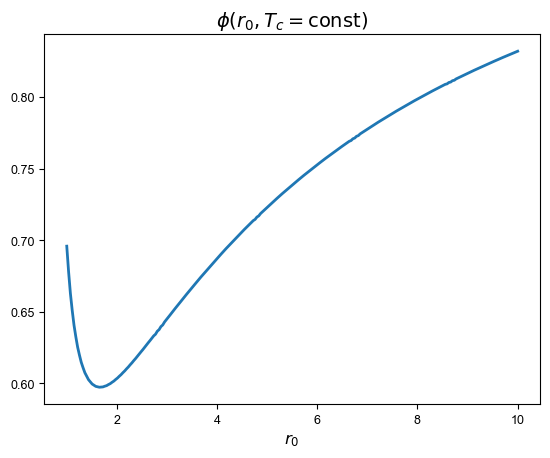

In [128]:
plt.plot(FM_r0.x_values, φ[:,5])
plt.xlabel('$r_0$')
plt.title('$\\phi(r_0, T_c=\\text{const})$');

#### Logscaled

In [129]:
# FM_r0 = FluxMap3D(syst_params, shell_generator, set_logscale=False)
# FM_r0.solve(n_jobs=-1)
# FM_r0.plot(set_ylog=True)

### Iterate over thicknesses $(\lambda)$ \& Comsumption Times $(T_c)$ 📄

In [130]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 100,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': (0.01, 1), #  (1e-3, 1e3)
    'n_Tc' : 250,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_l': 250,
    'r0': 1
}

FM_l = FluxMap3D(syst_params, shell_generator)
FM_l.solve(n_jobs=-1)

ODEs solved: 100%|██████████| 62500/62500 [06:37<00:00, 157.37it/s]


First, we need to find the minimum flux $\phi$ for each $T_c$:
$$m_{\phi} (T_c) = \min_{\lambda} \phi(T_c, \lambda)$$

This corresponds to the minimum flux for each row from the flux map $\phi$.

$$\phi(T_c, \lambda) \approx \phi[i_{T_c}, j_{\lambda}]$$

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
C:\Users\jorge\AppData\Local\Temp\ipykernel_38060\2571801213.py:13: SyntaxWarning: invalid escape sequence '\l'
  FM_l.ax.plot(FM_l.x_values, l_transect, 'r--', label='$\\text{min}_{\lambda} \\, \\phi$', linewidth=1)


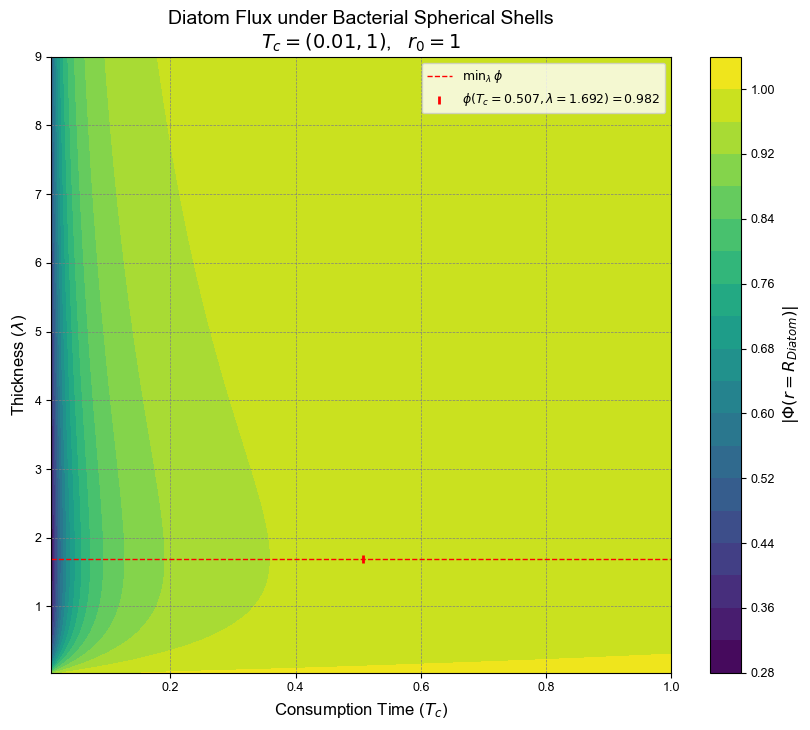

In [131]:
# Get the flux map
φ = FM_l.flux_map

# Find the positions where these minima occur
minl_indices = [np.argmin(φj) for φj in φ]
# Get the corresponding r0 values for the maximum flux
l_transect = [FM_l.y_values[i] for i in minl_indices]

# Plot the flux map
FM_l.plot()

# Add the maximum flux line connecting the maxima
FM_l.ax.plot(FM_l.x_values, l_transect, 'r--', label='$\\text{min}_{\\lambda} \\, \\phi$', linewidth=1)

Tc_p = FM_l.x_values[syst_params['n_Tc']//2]
l_p = l_transect[syst_params['n_l']//2]
φ_p  = φ[syst_params['n_Tc']//2, syst_params['n_l']//2]

label = f'$\\phi(T_c={Tc_p:.3f}, \\lambda={l_p:.3f})= {φ_p:.3f}$'
FM_l.ax.scatter(Tc_p, l_p, marker='|', color='red', label=label)
FM_l.ax.legend()
FM_l.save(figures_path, 'c_shell(l)_cross_section_lambda')

#### Smoothness of the Concentration Profile

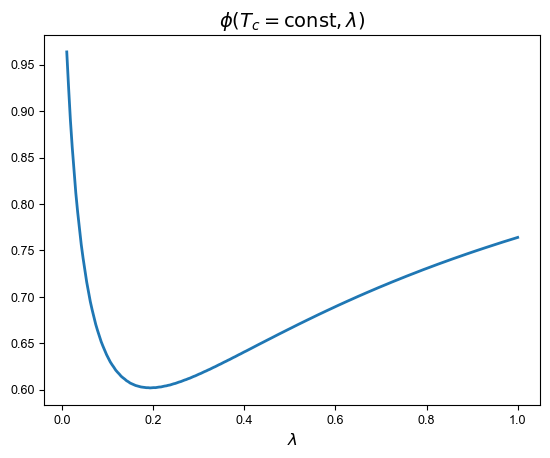

In [121]:
plt.plot(FM_r0.y_values, φ[5,:])
plt.xlabel('$\\lambda$')
plt.title('$\\phi(T_c=\\text{const}, \\lambda)$');

#### Logscaled

In [97]:
# FM_l = FluxMap3D(syst_params, shell_generator, set_logscale=True)
# FM_l.solve(n_jobs=-1)
# FM_l.plot(set_xlog=True)

### Check if $ \phi_a / \phi_b \Big|_{(r0,\lambda)} = $ const

We will asume that the flux's dependence on the absorption rate can be separated from the dependence on the concentration profile. This means that we can write:
$$
\phi(T_c, r_0, \lambda) = \varphi(T_c) \cdot \psi(r_0, \lambda)$$
$$

In [3]:
syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 10,
    'Tc': None,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_r0': 250,'n_l': 250
}

We create two fluxes for different absorption rates $a$ and $b$, but same concentration profile:
$$
\phi_a(T_c, r_0, \lambda) = \varphi_a(T_c) \cdot \psi(r_0, \lambda)
$$
$$
\phi_b(T_c, r_0, \lambda) = \varphi_b(T_c) \cdot \psi(r_0, \lambda)
$$
We can then write the ratio of the two fluxes as:
$$
\frac{\phi_a(T_c, r_0, \lambda)}{\phi_b(T_c, r_0, \lambda)} = \frac{\varphi_a(T_c)}{\varphi_b(T_c)}
$$
Removing the dependence on the concentration profile variables $r_0$ and $\lambda$. We should therefore expect that the ratio of the two fluxes is constant for all $r_0$ and $\lambda$.

In [ ]:
syst_params['Tc'] = 1e-2

FM_a = FluxMap3D(syst_params, shell_generator)
FM_a.solve(n_jobs=-1)
phi_a = FM_a.flux_map

ODEs solved:  70%|██████▉   | 21776/31126 [00:50<00:22, 423.84it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 31126/31126 [01:24<00:00, 369.99it/s]


In [ ]:
syst_params['Tc'] = 1

FM_b = FluxMap3D(syst_params, shell_generator)
FM_b.solve(n_jobs=-1)
phi_b = FM_b.flux_map

ODEs solved: 100%|██████████| 31126/31126 [02:22<00:00, 218.14it/s]


We remove the null-space of the flux-maps since they do not give us any information about the concentration profile and therefore we are able to divide two fluxes.

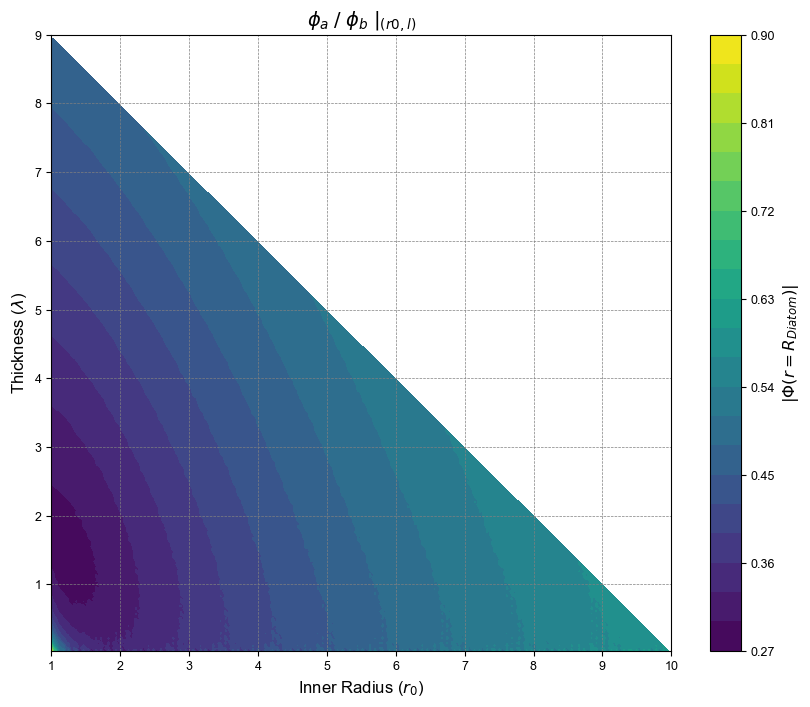

In [ ]:
phi_a[phi_a == 0] = np.nan
phi_b[phi_b == 0] = np.nan

FM = FluxMap3D(syst_params, None)
FM.title = '$\\phi_a \; / \; \\phi_b \; \Big|_{(r0,\lambda)}$'
FM.flux_map = phi_a / phi_b

FM.plot()

Therefore, by reduction to absurdity, we can conclude that the fluxes dependence over the absorption rate is not separable from the concentration profile.
$$\phi(T_c, r_0, \lambda) \neq \varphi(T_c)\cdot\psi(r_0, \lambda)$$